# brazil-covid-19

Import section:

In [515]:
import pandas
from io import StringIO
import re
import numpy
import seaborn
import matplotlib.pyplot as pyplot

Variables section:

In [524]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
today_minimum_number_of_cases_to_analize = 10000

Configs section:

In [525]:
seaborn.set_style("whitegrid")
seaborn.set_context("talk")

Function section:

In [526]:
def replace_less_than_with_nan(dataframe, less_than):
    for column in dataframe:
        if column == 'country':
            continue
        dataframe[column] = dataframe[column].astype(int)
        dataframe.loc[dataframe[column] < less_than, [column]] = numpy.nan
    return dataframe

def move_nans_to_right(dataframe):
    df1 = dataframe.apply(lambda x: pandas.Series(x.dropna().values), axis=1)
    #if possible different number of columns like original df is necessary reindex
    df1 = df1.reindex(columns=range(len(dataframe.columns)))
    #assign original columns names
    df1.columns = dataframe.columns
    return df1

Data cleaning:

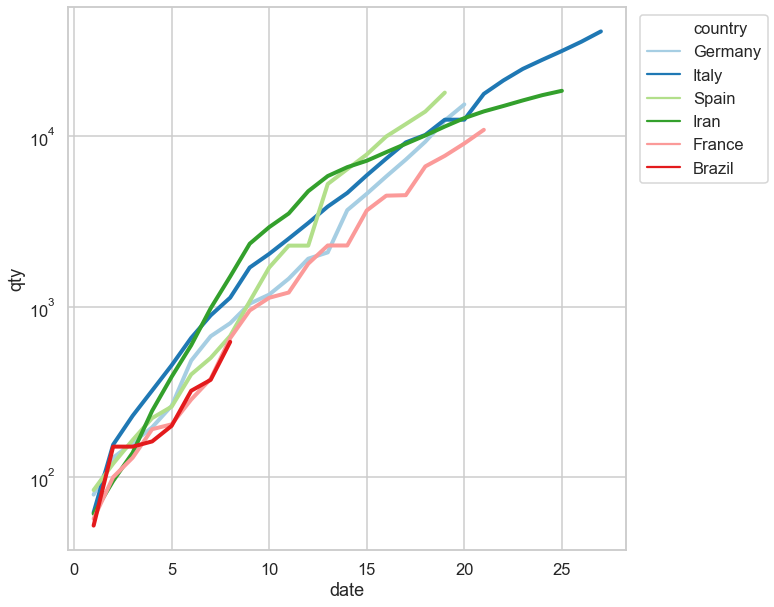

In [527]:
data = pandas.read_csv(url)
data = data.drop(['Lat', 'Long','Province/State'], axis=1)
data = data[~data['Country/Region'].str.contains("China")]
brazil_data = data[data["Country/Region"].str.match('Brazil')]
data = data[data[data.columns[-1]] > today_minimum_number_of_cases_to_analize]
data = data.append(brazil_data, ignore_index=True)
data = data.rename(columns={ data.columns[0]: "country" })

data = replace_less_than_with_nan(data, 50)
data = move_nans_to_right(data)
data = data.rename(columns={x:y for x,y in zip(data.columns,range(0,len(data.columns)))})
data.rename(columns={ data.columns[0]: "country" }, inplace = True)
data = data.melt(id_vars=['country'], var_name='date', value_name='qty')

fig, ax = pyplot.subplots(figsize=(10,10))
ax.set(yscale="log")
lineplot = seaborn.lineplot(x="date", y="qty", data=data, hue="country", linewidth=4, palette="Paired")
pyplot.legend(bbox_to_anchor=(1.01, 1), loc=2)